# Linear Algebra

In [241]:
from sklearn import decomposition, preprocessing, cluster
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import numpy as np
import math

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

Text(0,0.5,'Y')

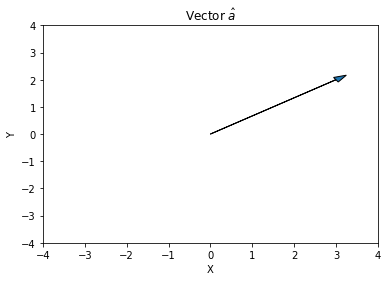

In [19]:
origin = np.array([0, 0])
a = np.array([3, 2])

plt.arrow(*origin, *a, head_width=0.2)

plt.xlim(-4,4)
plt.ylim(-4,4)

plt.title("Vector $\hat{a}$")
plt.xlabel("X")
plt.ylabel("Y")

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [6]:
b = np.array([17, -4, -2, 1])

np.linalg.norm(b)

17.606816861659009

## Answer

The norm of a vector is a measure of its size.

## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [7]:
c = np.array([3, 7, -2, 12])
d = np.array([9, -7, 4, 6])

c.dot(d)

42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [9]:
E = np.matrix(
    [[7, 4, 2],
     [1, 3, -1],
     [2, 6, -4]]
)

In [11]:
np.linalg.inv(E)

matrix([[ 0.17647059, -0.82352941,  0.29411765],
        [-0.05882353,  0.94117647, -0.26470588],
        [ 0.        ,  1.        , -0.5       ]])

In [10]:
E.T

matrix([[ 7,  1,  2],
        [ 4,  3,  6],
        [ 2, -1, -4]])

# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [277]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [27]:
def average(xs):
    return sum(xs)/len(xs)
    
def variance(xs):
    n = len(xs)
    mean = average(xs)
    differences = [(x-mean)**2 for x in xs]
    
    return sum(differences)/n
    
def stddev(xs):
    return math.sqrt(variance(xs))

def describe(xs):
    desc = collections.namedtuple("Description", ["mean", "var", "std"])
    
    return desc(
        mean = average(xs),
        var = variance(xs),
        std = stddev(xs)
    )

In [28]:
describe(customers)

Description(mean=1135.7142857142858, var=84653.06122448981, std=290.95199127087926)

In [29]:
describe(snow)

Description(mean=2.7142857142857144, var=7.346938775510203, std=2.7105237087157534)

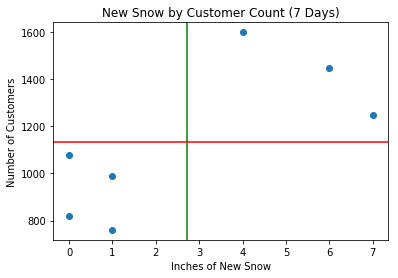

In [104]:
plt.title("New Snow by Customer Count (7 Days)")
plt.scatter(snow, customers)
plt.xlabel("Inches of New Snow")
plt.ylabel("Number of Customers")

snow_desc = describe(snow)
cust_desc = describe(customers)

plt.axvline(snow_desc.mean, color='green')
plt.axhline(cust_desc.mean, color='red')

## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

They are comparable. With specific respect to the covariance, it's due to the fact that we're taking the average of their products, which means
even though in some instances the product will be high, it'll quickly reduce to the mean, over whatever student-t distribution exists for those
variances.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [278]:
def covariance(xs,ys):
    assert(len(xs) == len(ys))
    
    xs_mean = average(xs)
    ys_mean = average(ys)
    
    dxs = [y-ys_mean for y in ys]
    dys = [x-xs_mean for x in xs]
    
    differences = [dxs*dys for dxs, dys in zip(dxs, dys)]
    
    return sum(differences)/(len(xs)-1)

def covariance_matrix(matrix):
    A = np.matrix(matrix)
    AT = matrix.T
    
    return [[covariance(colA, colB) for colB in AT] for colA in AT]

In [279]:
covariance_matrix(df.values)

[[98761.904761904778, 670.2380952380953],
 [670.2380952380953, 8.5714285714285712]]

In [280]:
np.cov(df.values.T).astype(np.uint64)

array([[98761,   670],
       [  670,     8]], dtype=uint64)

In [281]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


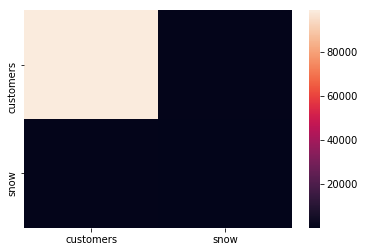

In [290]:
sns.heatmap(df.cov())

In [282]:
def scale_sample(sample, mean, std):
    sample = np.array(sample)
    sample_mean = sample.mean()
    sample_std = sample.std()
    
    return mean+(sample-sample_mean)*(std/sample_std)

In [286]:
df.apply(lambda col: scale_sample(col, 0, 1)).cov()

,customers,snow
customers,1.166667,0.849874
snow,0.849874,1.166667


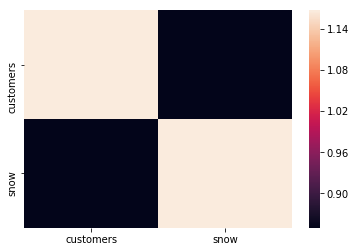

In [289]:
sns.heatmap(df.apply(lambda col: scale_sample(col, 0, 1)).cov())

In [284]:
def normalize_sample(sample):
    sample = np.array(sample)
    return (sample-sample.mean())/(sample.max()-sample.min())

In [287]:
df.apply(normalize_sample).cov()

,customers,snow
customers,0.139969,0.113986
snow,0.113986,0.174927


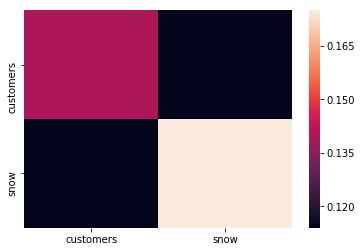

In [288]:
sns.heatmap(df.apply(normalize_sample).cov())

# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [136]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [96]:
numeric = df.select_dtypes(np.number)

In [139]:
numeric.apply(lambda col: scale_sample(col, 0, 1))

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,0.658275,-0.017495,-0.259546,0.644585,-0.632429,0.130551,-0.450076,0.863312,0.377736,-0.336265,0.805477,0.737407,-0.644322,-0.051917,-0.435231,0.104998,-0.138303
1,0.535805,-1.277169,1.198856,1.152440,1.535899,1.547958,0.435696,1.093528,1.401682,0.084066,1.171603,0.929297,1.679463,1.609440,-1.404236,0.841823,0.968122
2,0.535805,-0.227441,0.543811,-0.332059,-1.097071,-0.540853,-1.335847,-0.709834,-0.496364,1.513193,-0.878702,-0.057567,-0.855575,-0.467257,1.190727,0.716563,0.746837
3,-1.729885,1.522105,-1.483121,-1.464967,0.193601,-1.137656,1.350227,-1.247006,-1.283054,-1.260994,-1.098378,-1.609137,-0.179565,-1.090266,0.648741,-1.663384,-1.576656


In [140]:
numeric.apply(lambda col: scale_sample(col, 0, 1)).describe()

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
count,4.000000e+00,4.000000,4.000000,4.000000,4.000000e+00,4.000000,4.000000e+00,4.000000,4.000000,4.000000e+00,4.000000,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000,4.000000
mean,5.551115e-17,0.000000,0.000000,0.000000,-2.081668e-17,0.000000,-5.551115e-17,0.000000,0.000000,5.551115e-17,0.000000,-5.551115e-17,-2.775558e-17,-5.551115e-17,2.775558e-17,0.000000,0.000000
std,1.154701e+00,1.154701,1.154701,1.154701,1.154701e+00,1.154701,1.154701e+00,1.154701,1.154701,1.154701e+00,1.154701,1.154701e+00,1.154701e+00,1.154701e+00,1.154701e+00,1.154701,1.154701
min,-1.729885e+00,-1.277169,-1.483121,-1.464967,-1.097071e+00,-1.137656,-1.335847e+00,-1.247006,-1.283054,-1.260994e+00,-1.098378,-1.609137e+00,-8.555755e-01,-1.090266e+00,-1.404236e+00,-1.663384,-1.576656
25%,-3.061743e-02,-0.489873,-0.565440,-0.615286,-7.485897e-01,-0.690054,-6.715186e-01,-0.844127,-0.693036,-5.674473e-01,-0.933621,-4.454597e-01,-6.971356e-01,-6.230090e-01,-6.774824e-01,-0.337098,-0.497891
50%,5.358050e-01,-0.122468,0.142132,0.156263,-2.194142e-01,-0.205151,-7.189706e-03,0.076739,-0.059314,-1.260994e-01,-0.036613,3.399200e-01,-4.119437e-01,-2.595871e-01,1.067548e-01,0.410780,0.304267
75%,5.664224e-01,0.367405,0.707572,0.771549,5.291754e-01,0.484903,6.643289e-01,0.920866,0.633722,4.413479e-01,0.897009,7.853797e-01,2.851918e-01,3.634219e-01,7.842372e-01,0.747878,0.802159
max,6.582747e-01,1.522105,1.198856,1.152440,1.535899e+00,1.547958,1.350227e+00,1.093528,1.401682,1.513193e+00,1.171603,9.292974e-01,1.679463e+00,1.609440e+00,1.190727e+00,0.841823,0.968122


In [141]:
scaler = preprocessing.StandardScaler()
scaler.fit(numeric)
scaled = pd.DataFrame(scaler.transform(numeric), columns=df.drop(columns='Country').columns)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [142]:
scaled['Country'] = df['Country']
scaled

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery,Country
0,0.658275,-0.017495,-0.259546,0.644585,-0.632429,0.130551,-0.450076,0.863312,0.377736,-0.336265,0.805477,0.737407,-0.644322,-0.051917,-0.435231,0.104998,-0.138303,England
1,0.535805,-1.277169,1.198856,1.152440,1.535899,1.547958,0.435696,1.093528,1.401682,0.084066,1.171603,0.929297,1.679463,1.609440,-1.404236,0.841823,0.968122,Wales
2,0.535805,-0.227441,0.543811,-0.332059,-1.097071,-0.540853,-1.335847,-0.709834,-0.496364,1.513193,-0.878702,-0.057567,-0.855575,-0.467257,1.190727,0.716563,0.746837,Scotland
3,-1.729885,1.522105,-1.483121,-1.464967,0.193601,-1.137656,1.350227,-1.247006,-1.283054,-1.260994,-1.098378,-1.609137,-0.179565,-1.090266,0.648741,-1.663384,-1.576656,North Ireland


In [143]:
scaled.describe()

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
count,4.000000,4.000000,4.000000,4.000000,4.000000e+00,4.000000e+00,4.000000,4.000000e+00,4.000000,4.000000,4.000000e+00,4.000000,4.000000e+00,4.000000e+00,4.000000e+00,4.000000,4.000000e+00
mean,0.000000,0.000000,0.000000,0.000000,6.938894e-18,-5.551115e-17,0.000000,5.551115e-17,0.000000,0.000000,-5.551115e-17,0.000000,6.938894e-18,-5.551115e-17,-2.775558e-17,0.000000,5.551115e-17
std,1.154701,1.154701,1.154701,1.154701,1.154701e+00,1.154701e+00,1.154701,1.154701e+00,1.154701,1.154701,1.154701e+00,1.154701,1.154701e+00,1.154701e+00,1.154701e+00,1.154701,1.154701e+00
min,-1.729885,-1.277169,-1.483121,-1.464967,-1.097071e+00,-1.137656e+00,-1.335847,-1.247006e+00,-1.283054,-1.260994,-1.098378e+00,-1.609137,-8.555755e-01,-1.090266e+00,-1.404236e+00,-1.663384,-1.576656e+00
25%,-0.030617,-0.489873,-0.565440,-0.615286,-7.485897e-01,-6.900536e-01,-0.671519,-8.441271e-01,-0.693036,-0.567447,-9.336213e-01,-0.445460,-6.971356e-01,-6.230090e-01,-6.774824e-01,-0.337098,-4.978915e-01
50%,0.535805,-0.122468,0.142132,0.156263,-2.194142e-01,-2.051511e-01,-0.007190,7.673883e-02,-0.059314,-0.126099,-3.661260e-02,0.339920,-4.119437e-01,-2.595871e-01,1.067548e-01,0.410780,3.042670e-01
75%,0.566422,0.367405,0.707572,0.771549,5.291754e-01,4.849025e-01,0.664329,9.208660e-01,0.633722,0.441348,8.970087e-01,0.785380,2.851918e-01,3.634219e-01,7.842372e-01,0.747878,8.021585e-01
max,0.658275,1.522105,1.198856,1.152440,1.535899e+00,1.547958e+00,1.350227,1.093528e+00,1.401682,1.513193,1.171603e+00,0.929297,1.679463e+00,1.609440e+00,1.190727e+00,0.841823,9.681224e-01


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [249]:
pca = decomposition.PCA(n_components=2)
pca.fit(numeric.apply(normalize_sample))

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Text(0,0.5,'% of Variance Explained')

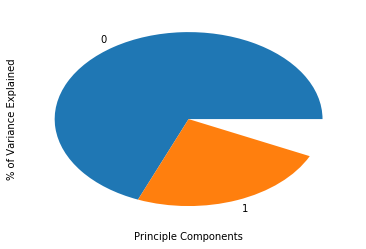

In [252]:
ax = pd.Series(pca.explained_variance_ratio_).plot.pie()

ax.set_xlabel("Principle Components")
ax.set_ylabel("% of Variance Explained")

Text(0,0.5,'Component 2')

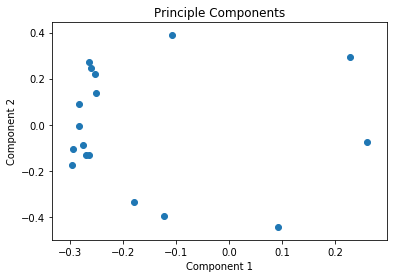

In [255]:
plt.scatter(*pca.components_)

plt.title("Principle Components")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

In [257]:
pca = decomposition.PCA(n_components=3)
pca.fit(numeric.apply(normalize_sample))

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [258]:
pca.explained_variance_ratio_

array([ 0.68832495,  0.24156417,  0.07011088])

Text(0,0.5,'% of Variance Explained')

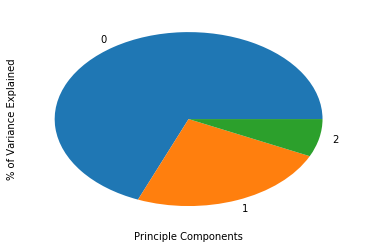

In [259]:
ax = pd.Series(pca.explained_variance_ratio_, index=["0", "1", "2"]).plot.pie()

ax.set_xlabel("Principle Components")
ax.set_ylabel("% of Variance Explained")

Text(0.5,0,'Principle Component 3')

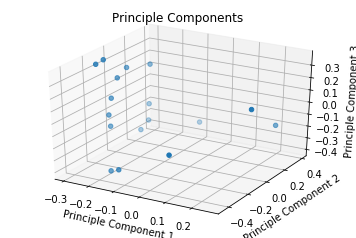

In [261]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*pca.components_)

ax.set_title("Principle Components")
ax.set_xlabel("Principle Component 1")
ax.set_ylabel("Principle Component 2")
ax.set_zlabel("Principle Component 3")

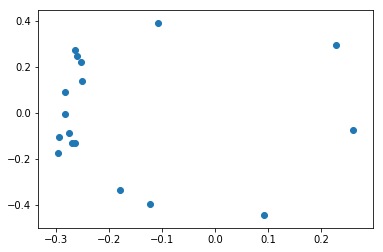

In [265]:
plt.scatter(pca.components_[0], pca.components_[1])

plt.title("Principle Components")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [112]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [174]:
points.shape

(200, 2)

In [164]:
kmeans = cluster.KMeans(n_clusters=5)
kmeans.fit(points)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [169]:
kmeans.cluster_centers_.T

array([[ 6.24979318, -0.47611541, -8.36652987, -3.59740679, -3.7805392 ],
       [ 3.84457183, -9.49475417, -3.61238083,  4.13344099, -7.60590614]])

Text(0.3,-1,'Clusters w/ Centers in Red')

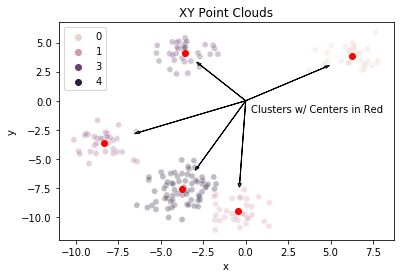

In [268]:
ax = sns.scatterplot(
    x=points.x,
    y=points.y,
    hue=kmeans.labels_,
    alpha=0.3
)

ax.scatter(*kmeans.cluster_centers_.T, c='red')

ax.set_title("XY Point Clouds");

for center in kmeans.cluster_centers_:
    ax.arrow(0, 0, *(center*0.75), head_width=0.2)
    
plt.annotate("Clusters w/ Centers in Red", xy=(0.3,-1))